In [1]:
###Importing Required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
###Importing Data from a CSV File to a DataFrame

df = pd.read_csv('housing.csv')
df=df.sample(frac=1)
df.index=(range(len(df)))
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,5.935,34.02,20.2,176400.0
1,5.990,14.67,21.0,367500.0
2,6.824,22.74,20.2,176400.0
3,6.750,7.74,20.2,497700.0
4,6.406,19.52,20.2,359100.0


In [3]:
###Converting data into Arrays using Numpy

##Splitting the Data into X and Y DataFrames
X = np.array(df.iloc[:,:-1])
y = np.array(df['MEDV'])

print("X")
print("")
print(X)
print("")
print("")
print("Y")
print(y)

X

[[ 5.935 34.02  20.2  ]
 [ 5.99  14.67  21.   ]
 [ 6.824 22.74  20.2  ]
 ...
 [ 6.021 10.3   17.8  ]
 [ 5.935  6.58  21.   ]
 [ 6.395 13.27  20.2  ]]


Y
[ 176400.  367500.  176400.  497700.  359100.  289800.  275100.  468300.
  422100.  783300.  474600.  445200.  472500.  462000.  577500.  697200.
  369600.  781200.  373800.  405300.  449400.  338100.  338100.  310800.
  611100.  275100.  462000.  428400.  432600.  760200.  415800.  436800.
  640500.  726600.  709800.  766500.  455700.  621600.  214200.  432600.
  346500.  499800.  147000.  344400.  411600.  151200.  459900.  283500.
  411600.  266700.  888300.  764400.  445200.  499800.  445200.  340200.
  789600.  359100.  327600.  690900.  695100.  436800.  560700.  302400.
  464100.  867300.  453600.  279300.  407400.  390600.  117600.  336000.
  493500.  737100.  396900.  373800.  953400.  361200.  661500.  449400.
  392700.  480900.  558600.  304500.  590100.  512400.  426300.  651000.
  569100.  525000.  646800.  636300.  30

In [4]:
X.shape

(489, 3)

In [5]:
X=X.reshape(489,3)
y=y.reshape(489,1)
print(X.shape)
print(y.shape)

(489, 3)
(489, 1)


In [6]:
###Making Data suitable for Linear Regression
m=X.shape[0]
print("m:",m)
##Padding X array with ones for the bias term
o = np.ones((m,1))
X = np.hstack((o,X))
print(X.shape)
print("")
print(X[:5,:])

m: 489
(489, 4)

[[ 1.     5.935 34.02  20.2  ]
 [ 1.     5.99  14.67  21.   ]
 [ 1.     6.824 22.74  20.2  ]
 [ 1.     6.75   7.74  20.2  ]
 [ 1.     6.406 19.52  20.2  ]]


In [7]:
def FeatureNormalization(x):
    x = x[:,1:]
    m = x.shape[0]
    mean = np.mean(x,axis=0)
    std = np.std(x,axis=0)
    x_norm = (x-mean)/std
    o = np.ones((m,1))
    x_norm = np.hstack((o,x_norm))
    return x_norm,mean,std

In [8]:
##Normalizing the array
X,mean,std = FeatureNormalization(X)
X[:5,:]

array([[ 1.        , -0.4747939 ,  2.97966481,  0.79817433],
       [ 1.        , -0.38925619,  0.24458382,  1.17748167],
       [ 1.        ,  0.90780646,  1.38526101,  0.79817433],
       [ 1.        ,  0.79271937, -0.73495682,  0.79817433],
       [ 1.        ,  0.25771991,  0.93012092,  0.79817433]])

In [9]:
n=int((0.8)*len(X))
X_train=X[:n]
X_test=X[n:]
y_train=y[:n]
y_test=y[n:]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(391, 4)
(391, 1)
(98, 4)
(98, 1)


In [10]:
#Initializing the Parameters
def InitialParameters(x):
    n = x.shape[1]
    theta = np.zeros((n,1))
    return theta
#InitialParameters(X_train).shape

In [11]:
##Cost Function 

def CostFunction(x,y,theta):
    ### Start code here
    h = np.dot(x,theta)
    m = float(x.shape[0])
    J = np.sum((1/(2*m))*(h-y)**2)
    return J,h
#CostFunction(X_train,Y_train,theta)

In [12]:
#Gradient Descent
def UpdateParameters(x,y,theta,h,alpha):
    ### Start code here
    m = float(x.shape[0])
    theta =theta-((alpha/m)*(np.dot(x.T,(h-y))))
    ### End code here
    return theta
#UpdateParameters(X_train,Y_train,theta,h,0.01)

In [13]:
##Training the model

alpha = 0.1
itr = 100000

theta = InitialParameters(X_train)
#print(theta.shape)
J_history = []
I_history = []

for i in range(itr):
    J,h = CostFunction(X_train,y_train,theta) # Call cost funtion
    J_history.append(J)
    #d_theta = GradDescent(X_train,Y_train,theta,h) # Call gradient Descent
    #theta = theta-(alpha*np.sum(d_theta)) # Update parameters
    theta=UpdateParameters(X_train,y_train,theta,h,alpha)
    I_history.append(i)

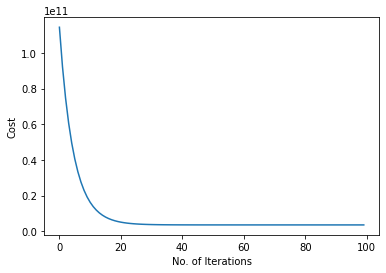

In [14]:
J_history = np.array(J_history)
J_history = J_history.reshape((itr,1))
J_history.shape

I_history = np.array(I_history)
I_history = I_history.reshape((itr,1))
I_history.shape
plt.ylabel("Cost")
plt.xlabel("No. of Iterations")
plt.plot(I_history[:100],J_history[:100])
plt.show()

In [15]:
theta

array([[450785.10510266],
       [ 62007.19349117],
       [-76303.02170089],
       [-43320.73063001]])

In [16]:
def mape(y_true,y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) *100

In [17]:
#Testing Set

Y_test_predict= np.dot(X_test,theta)
mse_test = np.square(np.subtract(y_test,Y_test_predict)).mean()
print("MAPE:",mape(y_test,Y_test_predict))

MAPE: 16.653604698971247


In [18]:
y_test[:5]

array([[497700.],
       [663600.],
       [940800.],
       [514500.],
       [474600.]])

In [19]:
Y_test_predict[:5]

array([[584327.27667162],
       [673435.42739449],
       [763976.08649209],
       [594952.9590195 ],
       [488968.7091327 ]])